In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SIZE = 8
img = np.random.rand(SIZE, SIZE) ** 3

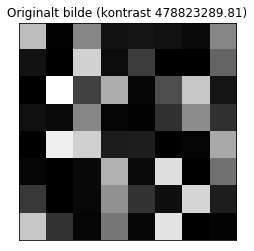

In [3]:
plt.imshow(img, plt.cm.gray)
plt.title("Originalt bilde (kontrast %.2f)" % (img.max() / img.min()))
plt.xticks([])
plt.yticks([])
print()

In [4]:
N = 6

dT = 2 ** np.arange(1, N + 1)
exs = np.array([(img * 0.1 * dt * 255).clip(0, 255).astype(np.uint8) for dt in dT])

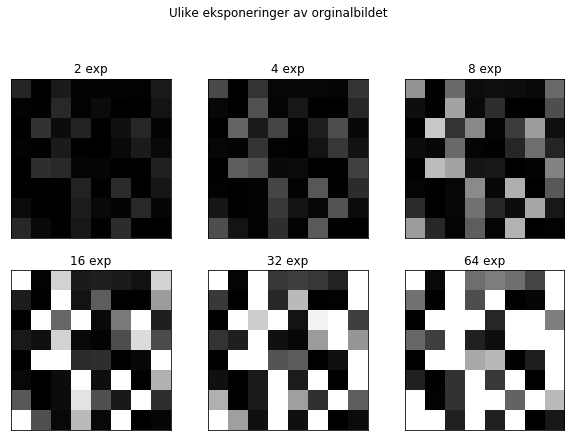

In [5]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.suptitle("Ulike eksponeringer av orginalbildet")

for i, (dt, imge) in enumerate(zip(dT, exs)):
    ax = fig.add_subplot(N // 2, (N + 1) // 2, i + 1, xticks=[], yticks=[])
    ax.imshow(imge, plt.cm.gray, vmin=0, vmax=255)
    ax.set_title('%d exp' % dt)

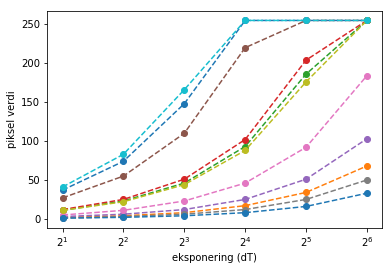

In [6]:
plt.xlabel('eksponering (dT)')
plt.ylabel('piksel verdi')
plt.xscale('log', basex=2)

for eksps in exs.reshape(N, -1).T[::(exs.shape[1] * exs.shape[2]) // 10]:
    plt.plot(dT, eksps, 'o--')

In [7]:
from hdrie import rekonstruksjon

p, lE = rekonstruksjon.debevec_maliks(exs, dT, 40, 256)

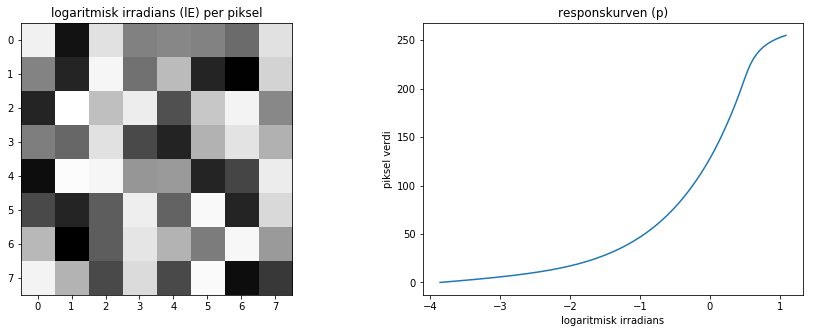

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(lE, plt.cm.gray)
axs[0].set_title('logaritmisk irradians (lE) per piksel')

axs[1].set_title('responskurven (p)')
axs[1].set_ylabel('piksel verdi')
axs[1].set_xlabel('logaritmisk irradians')
axs[1].plot(p, np.arange(256))

In [9]:
from hdrie.rekonstruksjon import rekonstruer_irradians

lE = rekonstruer_irradians(exs, dT, p, 256)

In [10]:
print("Forventet: ", img.min(), img.max(), abs(img.max() / img.min()))

kons = np.exp(lE)
print("Rekonstruert: ", kons.min(), kons.max(), abs(kons.max() / kons.min()))

Forventet:  2.0487304059662837e-09 0.9809798329275687 478823289.81440073
Rekonstruert:  0.0012923477144658989 0.19346918125202847 149.703658764921


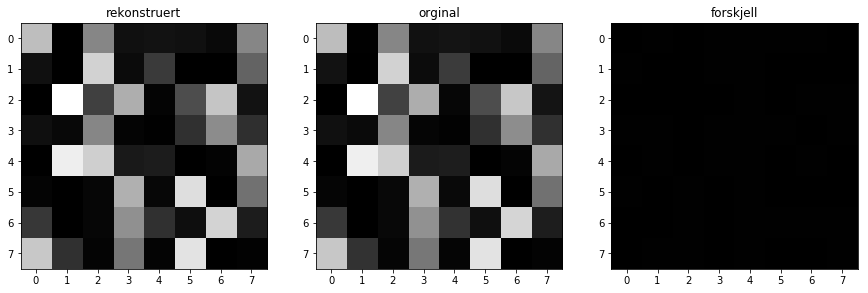

In [11]:
def scale(m, r=(0, 1)):
    new_min, new_max = r
    return new_min + (((m - m.min()) * new_max) / (m.max() - m.min()))

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].set_title('rekonstruert')
axs[0].imshow(scale(kons), plt.cm.gray, vmin=0, vmax=1)
axs[1].set_title('orginal')
axs[1].imshow(scale(img), plt.cm.gray, vmin=0, vmax=1)
axs[2].set_title('forskjell')
axs[2].imshow(np.abs(scale(kons) - scale(img)), plt.cm.gray, vmin=0, vmax=1)